<a href="https://colab.research.google.com/github/dkangala/workarea/blob/master/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Store and read the data
import pandas as pd
df = pd.read_csv("CustomerLocation.csv")
df


,Sr No,Latitude,Longitude
0,1,27.722900,80.944790
1,2,27.229840,80.935510
2,3,27.461060,80.413450
3,4,27.407980,80.992260
4,5,27.535890,80.526440
...,...,...,...
806,807,27.626280,80.729619
807,808,27.258628,81.234500
808,809,27.376071,80.786706
809,810,27.424503,80.804089


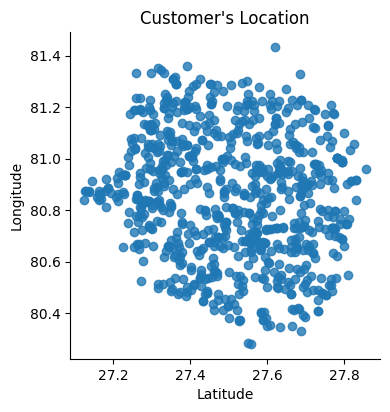

In [8]:
#plot the data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.lmplot( x="Latitude", y="Longitude", data=df, fit_reg = False, height = 4)
plt.title("Customer's Location")
plt.show()


In [9]:
new_df = df[["Latitude","Longitude"]]
new_df


,Latitude,Longitude
0,27.722900,80.944790
1,27.229840,80.935510
2,27.461060,80.413450
3,27.407980,80.992260
4,27.535890,80.526440
...,...,...
806,27.626280,80.729619
807,27.258628,81.234500
808,27.376071,80.786706
809,27.424503,80.804089


Text(0, 0.5, 'Sum of Squared Error')

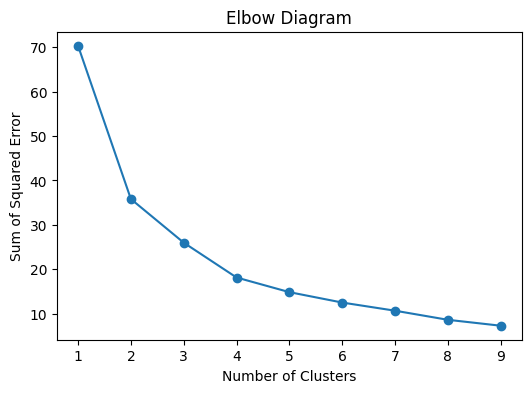

In [10]:
#Determining number of clusters

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(new_df )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" )
plt.title('Elbow Diagram')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')


In [11]:
#K-means Clustering
from sklearn.cluster import KMeans
clusters_new = KMeans(4)
clusters_new.fit(new_df )
new_df.insert(loc=2,column='clusterid',value=clusters_new.labels_)
new_df


,Latitude,Longitude,clusterid
0,27.722900,80.944790,2
1,27.229840,80.935510,3
2,27.461060,80.413450,1
3,27.407980,80.992260,0
4,27.535890,80.526440,1
...,...,...,...
806,27.626280,80.729619,1
807,27.258628,81.234500,0
808,27.376071,80.786706,3
809,27.424503,80.804089,3


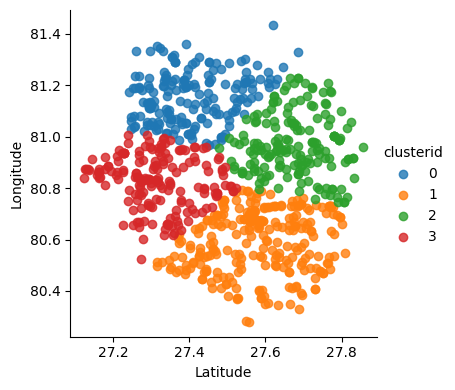

In [12]:
#Plot the clusters
import seaborn as sn
sn.lmplot( x="Latitude", y="Longitude", data=new_df, hue = "clusterid", fit_reg=False,height = 4 );


In [13]:
#Centroid of the clusters
centers = np.array(clusters_new.cluster_centers_)
centers


array([[27.40338604, 81.15058569],
       [27.58149918, 80.59380691],
       [27.67638105, 80.96839918],
       [27.31910434, 80.82738062]])

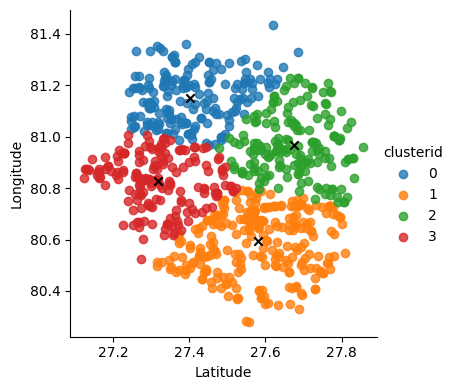

In [14]:
#Plot the centroids on the clusters
import seaborn as sn
sn.lmplot( x="Latitude", y="Longitude", data=new_df, hue = "clusterid", fit_reg=False,height = 4 );
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.show()
